### Step 1: Load the python libraries needed

In [61]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### Step 2: Read in data

In [62]:
df_raw = pd.read_csv('finalproject_dataframe_2.csv')
df_raw.head()

,panelistid,education,employment,marital_status,city,state,zipcode,gender,age,ethnicity,...,conversion,campaign,vertical,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,2473181,"Some College, A.A. Degree or Technical College",Full-time Blue Collar,Single,Nederland,TX,77627,Male,19,Caucasian,...,0,BWW Fantasy Football,Dining,0,0,0,1,1,0,1
1,1327885,Finished College (4-year degree),Full-time White Collar,Married,Fort Lauderdale,FL,33308,Male,46,Caucasian,...,0,BWW Fantasy Football,Dining,0,0,0,0,1,1,0
2,2350042,"Some College, A.A. Degree or Technical College",Part-time,Single,Arlington,TX,76010,Male,23,Hispanic/Latino,...,0,BWW Fantasy Football,Dining,0,0,0,0,0,0,1
3,2055981,"Some College, A.A. Degree or Technical College",Full-time White Collar,In a relationship,Huntington Park,CA,90255,Female,29,Hispanic/Latino,...,0,BWW Fantasy Football,Dining,0,1,0,1,0,0,0
4,2214039,"Some College, A.A. Degree or Technical College",Student,In a relationship,Mesa,AZ,85201,Male,22,Native American/Alaskan,...,0,BWW Fantasy Football,Dining,1,0,0,0,1,0,0


In [63]:
df_raw.count()

panelistid         5647
education          5647
employment         5647
marital_status     5647
city               5636
state              5636
zipcode            5647
gender             5647
age                5647
ethnicity          5647
income             5647
ooh_exposure       5647
billboard          5647
mall               5647
office             5647
billboard_freq     5647
mall_freq          5647
office_freq        5647
mobile_exposure    5647
mobile_freq        5647
conversion         5647
campaign           5647
vertical           5647
dow_0              5647
dow_1              5647
dow_2              5647
dow_3              5647
dow_4              5647
dow_5              5647
dow_6              5647
dtype: int64

Findings: It seems like city and state are missing values. But we should be fine here because we won't be creating dummy variables base off of these two fields. 

In [4]:
#Summary statistics
df_raw.describe()

,panelistid,zipcode,age,ooh_exposure,billboard,mall,office,billboard_freq,mall_freq,office_freq,mobile_exposure,mobile_freq,conversion,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
count,5.647000e+03,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.00000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000
mean,2.153784e+06,47308.485568,31.110501,0.947406,0.616965,0.133699,0.418806,1.921374,0.341774,1.474588,0.072428,0.677528,0.037365,0.20595,0.356118,0.366212,0.389587,0.369577,0.415265,0.267576
std,5.523288e+05,31032.748895,9.023929,0.223242,0.486170,0.340359,0.493407,3.255805,1.506061,3.311016,0.259218,4.406420,0.189671,0.40443,0.478893,0.481811,0.487700,0.482733,0.492811,0.442734
min,4.757000e+03,97.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979056e+06,20052.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.301245e+06,39157.000000,29.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.525310e+06,76107.500000,36.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.818505e+06,99354.000000,75.000000,1.000000,1.000000,1.000000,1.000000,34.000000,41.000000,44.000000,1.000000,164.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Findings: based on summary statistics, it seems like the age field has some weird values, such as -1. We'll have to fix these values if age proves to be an important feature. 

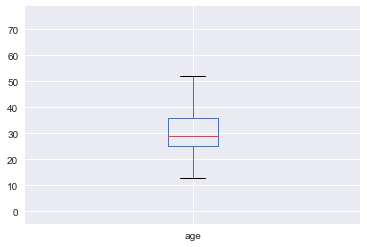

In [5]:
#boxplot on age
df_raw['age'].plot.box()

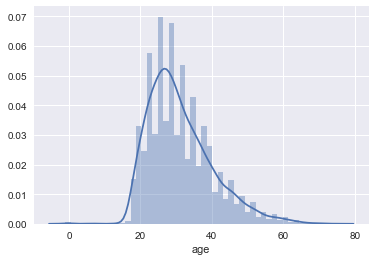

In [6]:
#distribution of age
sns.distplot(df_raw['age'])
#the distribution of the age variable seems normal; therefore, it could be used as a continuous variable in our logistic regression model. 

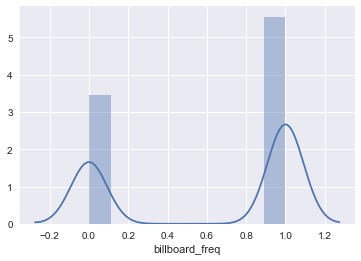

In [7]:
sns.distplot(df_raw['billboard_freq'] != 0)
#distribution of billboard exposure frequency is not normal -> not recommended to use as a continuous independent variable

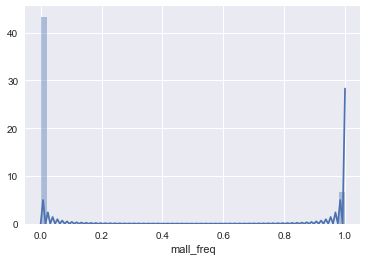

In [8]:
sns.distplot(df_raw['mall_freq'] != 0)
#distribution of mall exposure frequency is not normal, either -> not recommended to use as a continuous independent variable

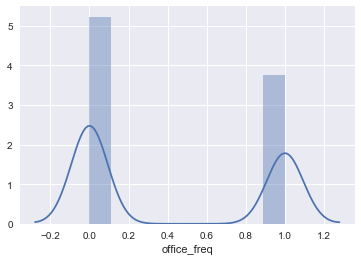

In [9]:
sns.distplot(df_raw['office_freq'] != 0)
#distribution of office exposure frequency is not normal, either -> not recommended to use as a continuous independent variable

In [10]:
df_raw.corr()

,panelistid,zipcode,age,ooh_exposure,billboard,mall,office,billboard_freq,mall_freq,office_freq,mobile_exposure,mobile_freq,conversion,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
panelistid,1.000000,0.020339,-0.180608,-0.002384,-0.009454,-0.029103,-0.008161,-0.035879,0.004636,0.012930,0.004380,-0.007916,0.011536,-0.042872,-0.015910,-0.012177,-0.006810,-0.000410,-0.002361,-0.024614
zipcode,0.020339,1.000000,0.004999,-0.068542,0.034707,-0.162218,-0.094448,-0.072911,-0.125576,-0.122586,0.069850,0.054414,-0.071462,-0.043299,-0.104131,-0.079772,-0.078499,-0.097110,-0.124725,-0.032598
age,-0.180608,0.004999,1.000000,0.066715,0.099557,-0.018132,-0.013737,0.105468,-0.018340,0.022822,-0.066646,-0.026529,-0.038010,0.030210,0.044624,0.046541,0.036538,0.046245,0.024847,0.023232
ooh_exposure,-0.002384,-0.068542,0.066715,1.000000,0.299028,0.092562,0.200008,0.139057,0.053473,0.104942,-0.843184,-0.429563,0.021322,-0.033022,0.039375,0.077007,0.090624,0.090007,0.084253,0.015178
billboard,-0.009454,0.034707,0.099557,0.299028,1.000000,-0.131450,-0.463777,0.465030,-0.096696,-0.221431,-0.235181,-0.111243,-0.057967,0.247242,0.014670,0.067384,0.034868,0.016146,-0.022756,0.285341
mall,-0.029103,-0.162218,-0.018132,0.092562,-0.131450,1.000000,-0.109895,0.015082,0.577704,-0.043270,-0.089701,-0.050254,-0.014296,0.142191,0.049041,0.009191,0.016924,0.045243,0.095537,0.166881
office,-0.008161,-0.094448,-0.013737,0.200008,-0.463777,-0.109895,1.000000,-0.157008,-0.075389,0.524689,-0.190122,-0.110087,0.067436,-0.168705,0.184980,0.167565,0.217592,0.212637,0.213349,-0.193631
billboard_freq,-0.035879,-0.072911,0.105468,0.139057,0.465030,0.015082,-0.157008,1.000000,0.009960,-0.043988,-0.112453,-0.049521,-0.058627,0.354765,0.282980,0.306386,0.270158,0.288841,0.239803,0.374740
mall_freq,0.004636,-0.125576,-0.018340,0.053473,-0.096696,0.577704,-0.075389,0.009960,1.000000,-0.033919,-0.047086,-0.018192,-0.019912,0.137401,0.115343,0.072056,0.071882,0.104930,0.118015,0.175468
office_freq,0.012930,-0.122586,0.022822,0.104942,-0.221431,-0.043270,0.524689,-0.043988,-0.033919,1.000000,-0.105061,-0.058803,0.052419,-0.080412,0.315624,0.294722,0.324546,0.327290,0.296126,-0.071178


Findings: Billboard exposure frequency and day of week seems to have relatively high correlation. Therefore, we will use a binary version of the variable (whether or not someone is exposed to billboard) instead of a continuous variable to represent frequency. On the other hand, panelistid and zipcode will not be used as independent variables (even though they look like numbers) because they do not represent a numerical value of the field. 

ooh_exposure will not be used as an independent variable here either because exposure to one of the three venue types (billboard, mall, office) represents OOH exposure. 

In addition, it seems like currently no single feature has a strong correlation with conversion. Feature engineering needed for dummy variables.

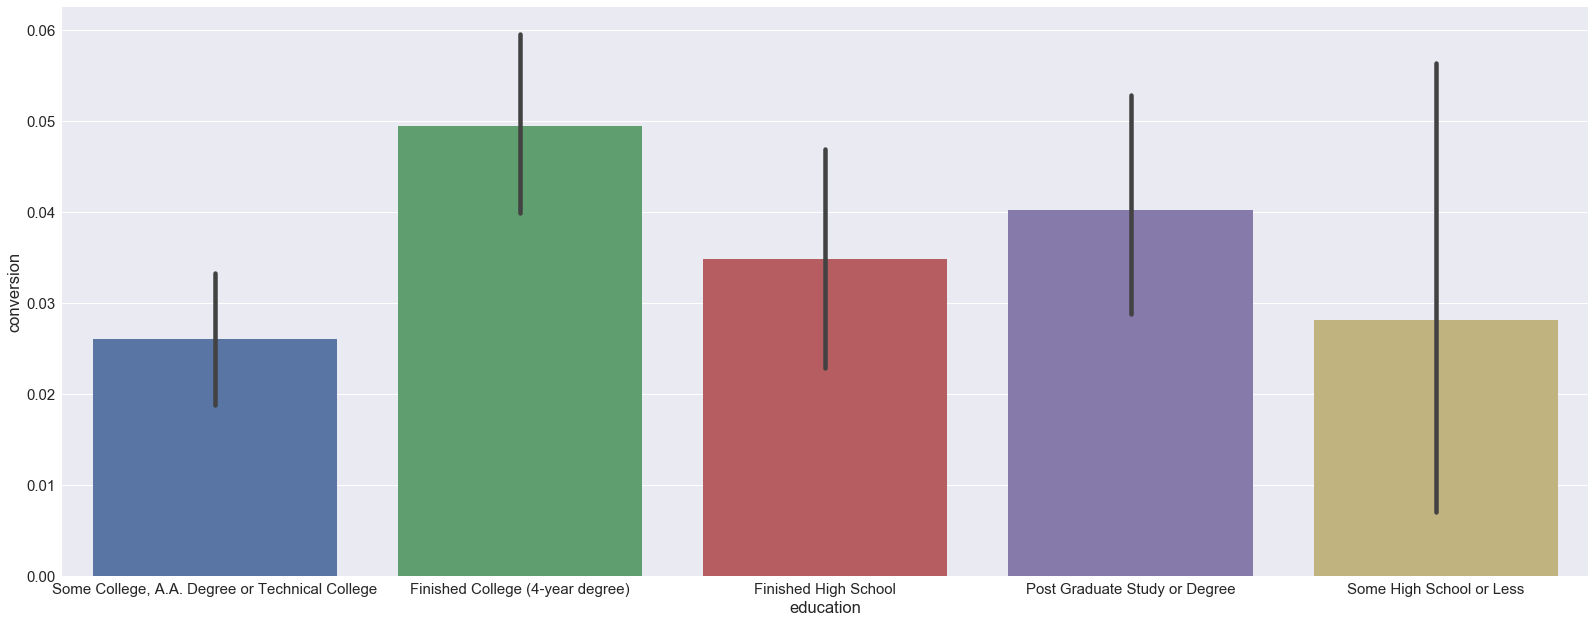

In [29]:
sns.factorplot(x='education', 
              y='conversion',
              kind='bar',
              data = df_raw,
              size = 9,
              aspect = 2.5, 
              )
#Those who finished college seem to have slightly more admissions while those who did not finish college seem to be the opposite.

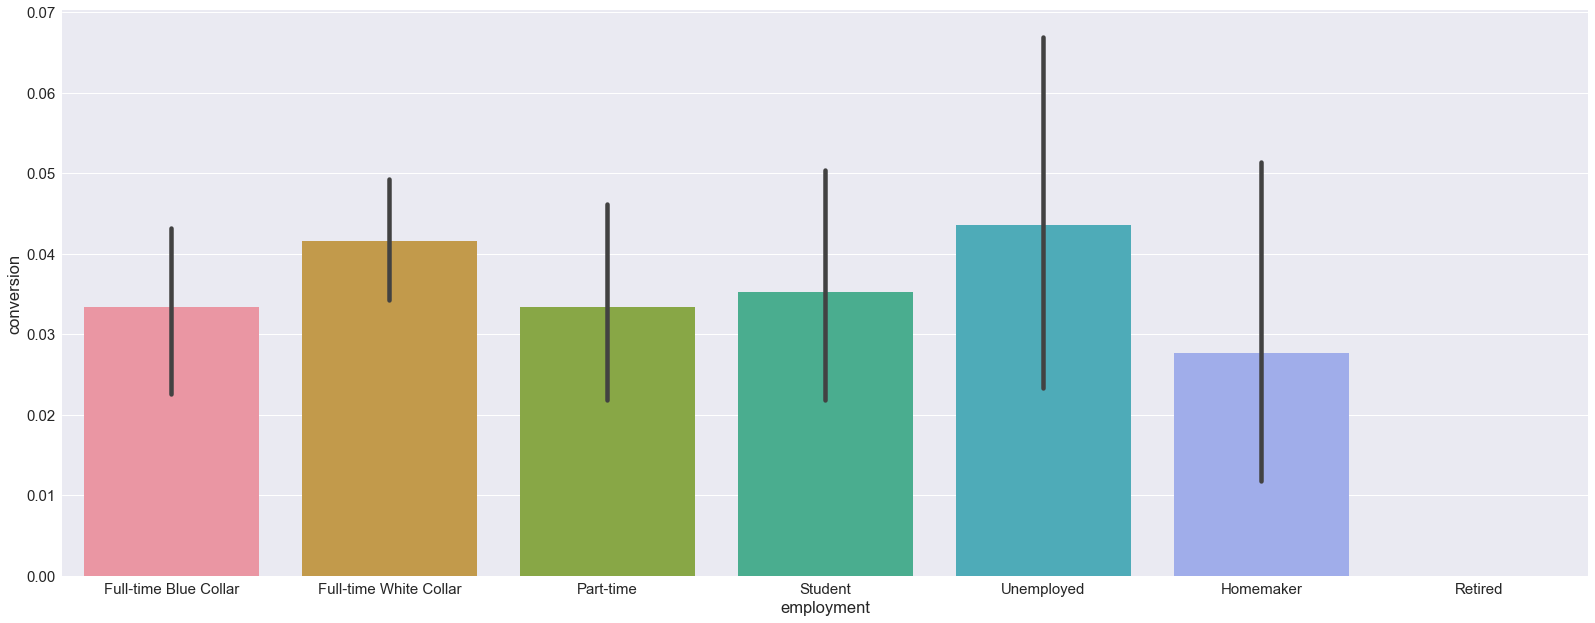

In [30]:
sns.factorplot(x='employment', 
              y='conversion',
              kind='bar',
              data = df_raw,
              size = 9,
              aspect = 2.5)
#It seems like there is no significant difference among the different categories of employment in relation to conversion.

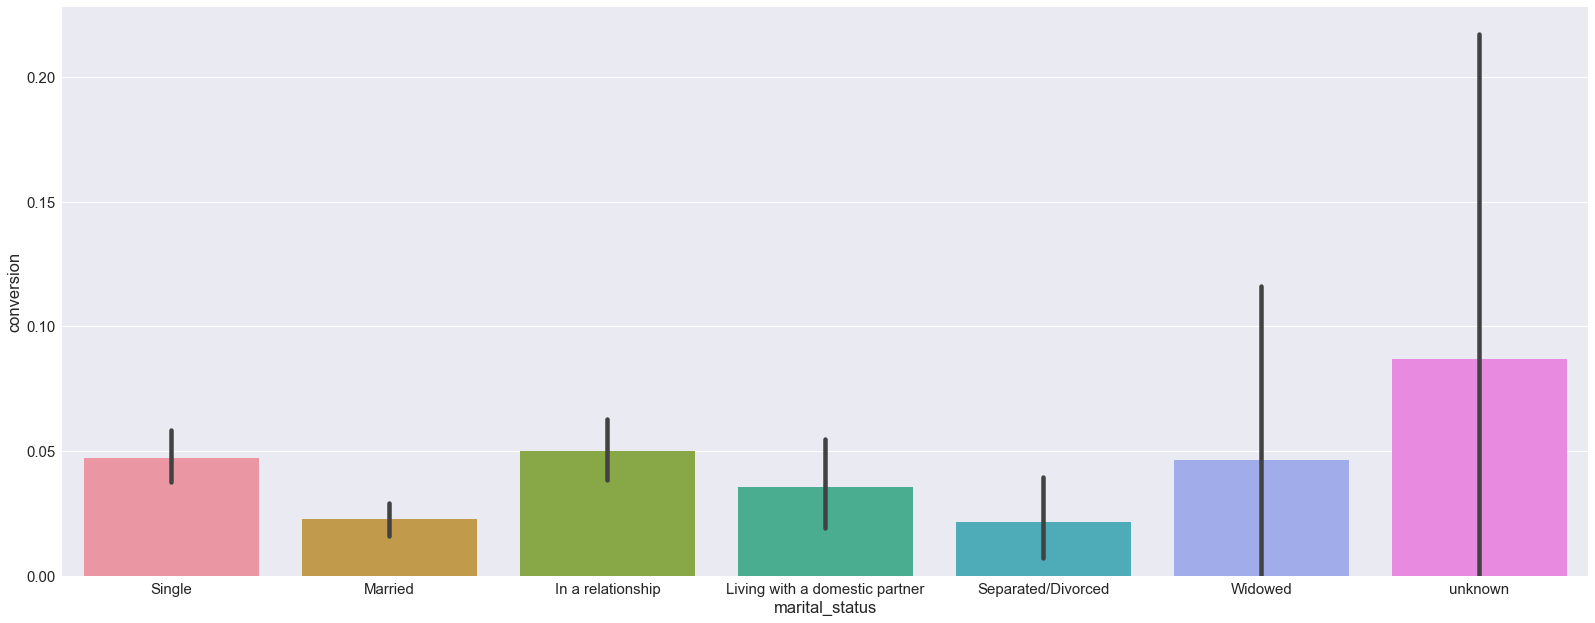

In [32]:
sns.factorplot(x='marital_status', 
              y='conversion',
              kind='bar',
              data = df_raw,
              size = 9,
              aspect = 2.5)
#Here, it seems like those who are single had more conversions than those who are married. 

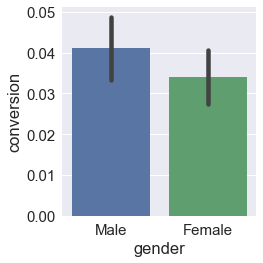

In [34]:
sns.factorplot(x='gender', 
              y='conversion',
              kind='bar',
              data = df_raw)
#It seems like there is not a significant difference between male and female users when it comes to conversion. 

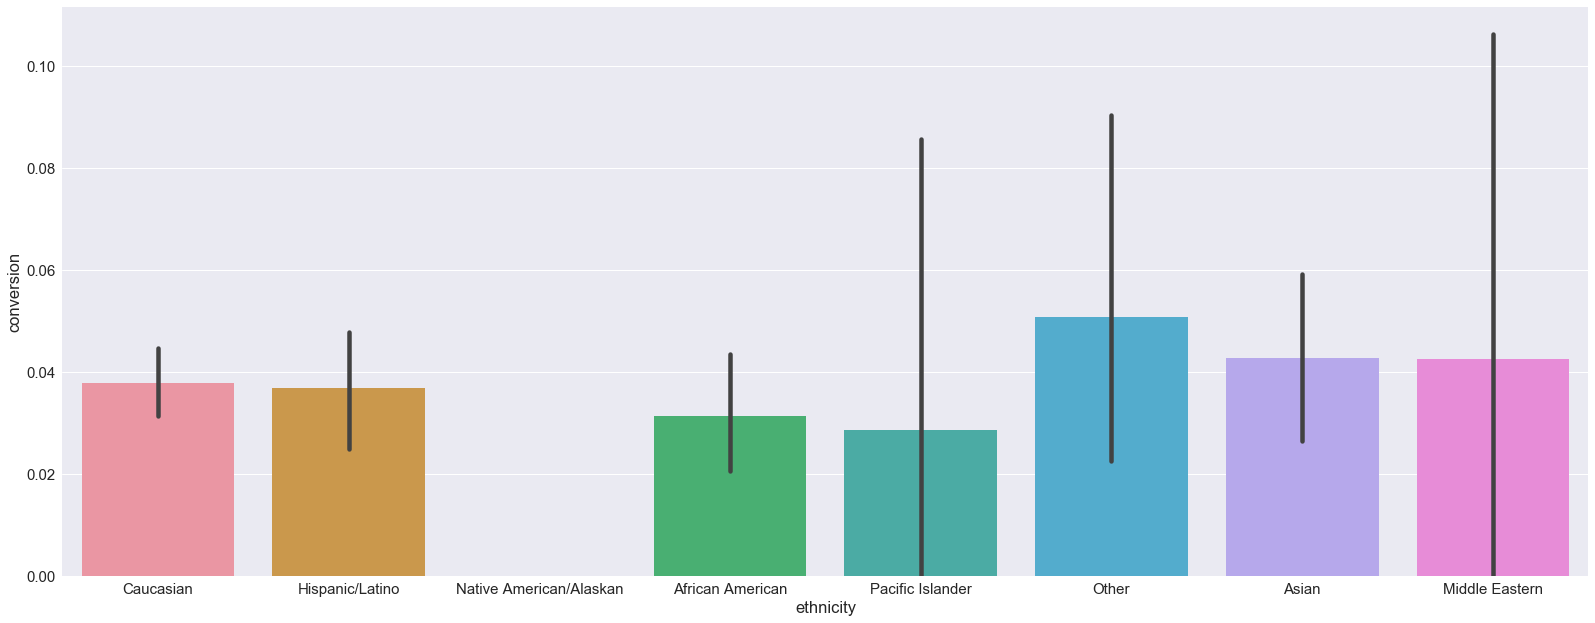

In [35]:
sns.factorplot(x='ethnicity', 
              y='conversion',
              kind='bar',
              data = df_raw,
              size = 9,
              aspect = 2.5)
#Ethnicity does not seem to provide much insight into how different ethnical backgrounds affect conversions. 

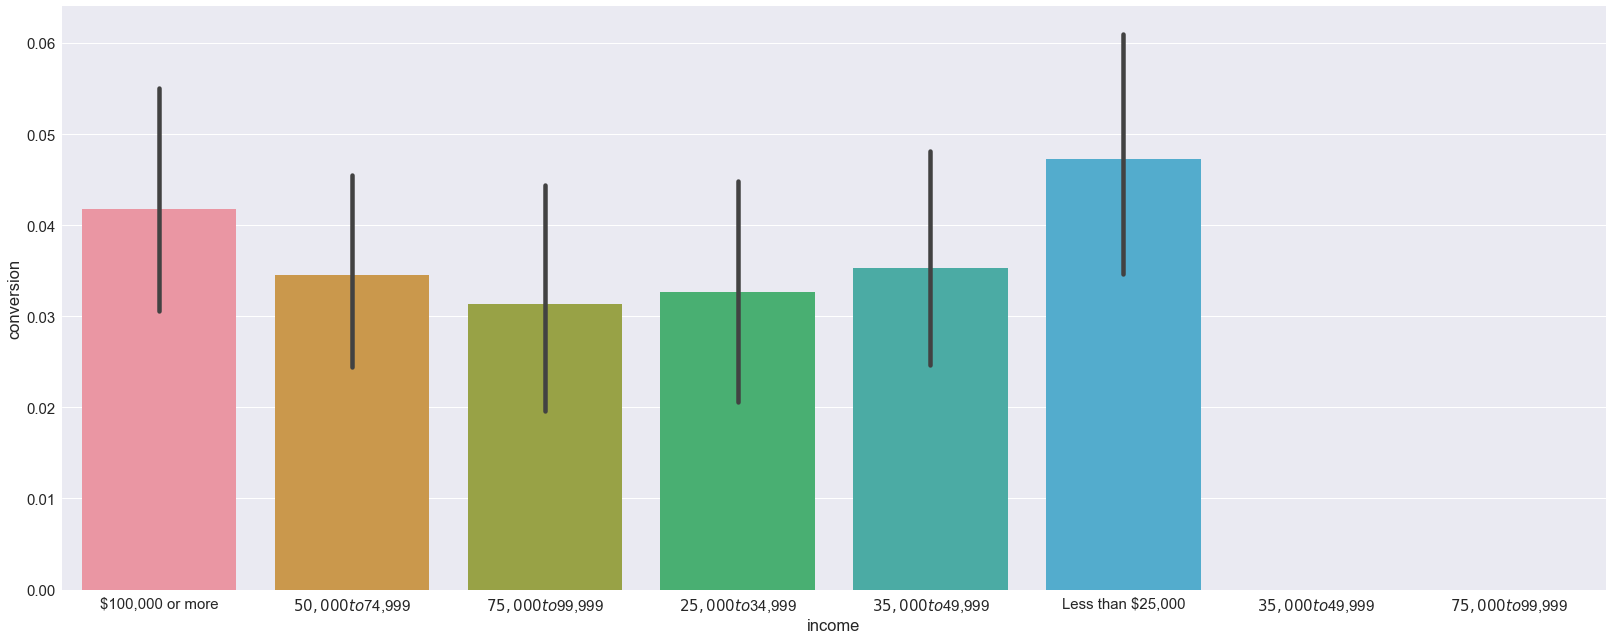

In [80]:
sns.factorplot(x='income', 
              y='conversion',
              kind='bar',
              data = df_raw,
              size = 9,
              aspect = 2.5)
#It doesn't seem like differences in income levels have an impact on conversions.
#There also seems to be duplicate values here, so that needs to be fixed. 

In [162]:
df_raw['income'] = df_raw['income'].replace(['$75,000 to $99,999 ','$35,000 to $49,999 '],['$75,000 to $99,999','$35,000 to $49,999'])

In [163]:
df_raw.income.unique()

array(['$100,000 or more', '$50,000 to $74,999', '$75,000 to $99,999',
       '$25,000 to $34,999', '$35,000 to $49,999', 'Less than $25,000'], dtype=object)

In [64]:
pd.DataFrame(df_raw['age'].value_counts(sort=True)).sort_index()
#It seems like a couple of age values such as -1 and 0 are outliers or errors resulting from the user input nature of this data. 
#Therefore, we'll have to replace them in order to avoid skewing our outcomes.

,age
-1,1
0,3
6,1
7,1
13,1
15,2
16,1
17,6
18,130
19,138


In [65]:
df_raw['age'] = df_raw['age'].replace([-1,0,6,7],[18,18,18,18])

In [68]:
#checking
pd.DataFrame(df_raw['age'].value_counts(sort=True)).sort_index().head()

,age
13,1
15,2
16,1
17,6
18,136


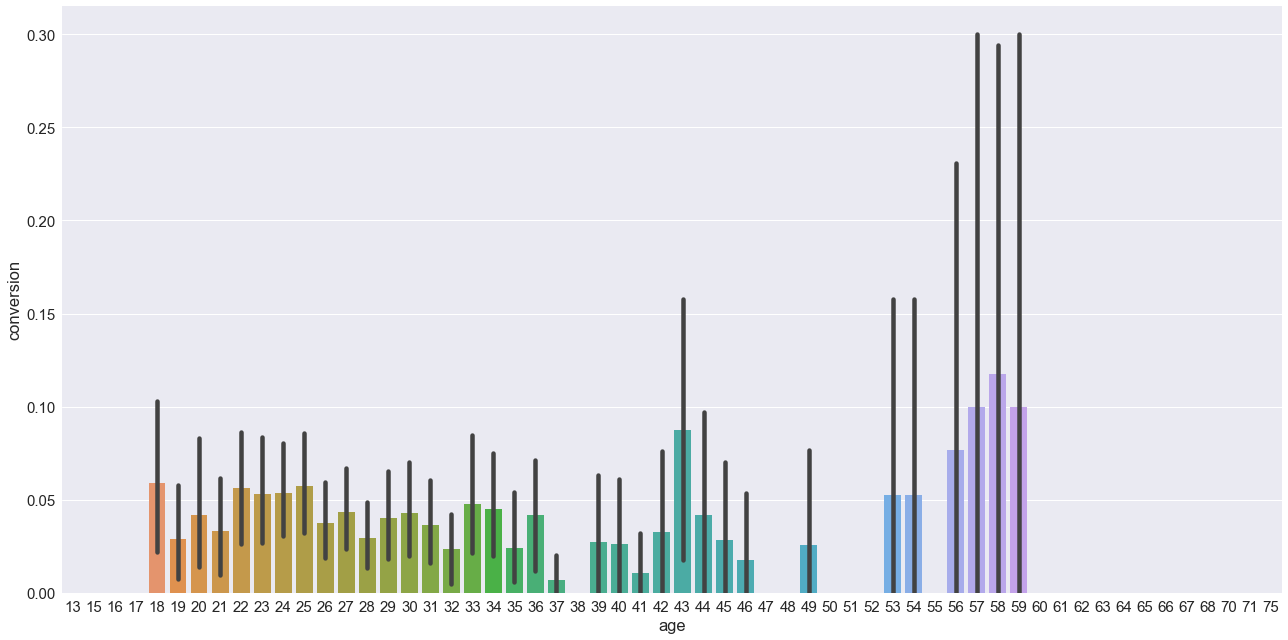

In [72]:
sns.factorplot(x='age', 
              y='conversion',
              kind='bar',
              data = df_raw,
              size = 9,
              aspect = 2)
#From this graph it does not seem like age provides good indication of whether someone would be converted or not. 

In [73]:
education = pd.get_dummies(df_raw['education'],prefix="education")
education_d = education.iloc[:,:4]
education_d.head()

,education_Finished College (4-year degree),education_Finished High School,education_Post Graduate Study or Degree,"education_Some College, A.A. Degree or Technical College"
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [74]:
job = pd.get_dummies(df_raw['employment'],prefix="job")
job_d = job.iloc[:,:6]
job_d.head()

,job_Full-time Blue Collar,job_Full-time White Collar,job_Homemaker,job_Part-time,job_Retired,job_Student
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1


In [75]:
relationship = pd.get_dummies(df_raw['marital_status'],prefix="relationship")
relationship_d = relationship.iloc[:,:6]
relationship_d.head()

,relationship_In a relationship,relationship_Living with a domestic partner,relationship_Married,relationship_Separated/Divorced,relationship_Single,relationship_Widowed
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [76]:
gender = pd.get_dummies(df_raw['gender'],prefix="gender")
is_female = gender.iloc[:,:1]
is_female.head()

,gender_Female
0,0
1,0
2,0
3,1
4,0


In [77]:
race = pd.get_dummies(df_raw['ethnicity'],prefix="race")
race_d = race.iloc[:,:7]
race_d.head()

,race_African American,race_Asian,race_Caucasian,race_Hispanic/Latino,race_Middle Eastern,race_Native American/Alaskan,race_Other
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [168]:
income = pd.get_dummies(df_raw['income'],prefix="income")
income_d = income.iloc[:,:5]
income_d.head()

,"income_$100,000 or more","income_$25,000 to $34,999","income_$35,000 to $49,999","income_$50,000 to $74,999","income_$75,000 to $99,999"
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0


In [169]:
dummy_features_all = education_d.join(job_d).join(relationship_d).join(is_female).join(race_d).join(income_d)
dummy_features_all.head()

,education_Finished College (4-year degree),education_Finished High School,education_Post Graduate Study or Degree,"education_Some College, A.A. Degree or Technical College",job_Full-time Blue Collar,job_Full-time White Collar,job_Homemaker,job_Part-time,job_Retired,job_Student,...,race_Caucasian,race_Hispanic/Latino,race_Middle Eastern,race_Native American/Alaskan,race_Other,"income_$100,000 or more","income_$25,000 to $34,999","income_$35,000 to $49,999","income_$50,000 to $74,999","income_$75,000 to $99,999"
0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [170]:
dummy_features_select = education_d.join(job_d).join(relationship_d)
dummy_features_select.head()

,education_Finished College (4-year degree),education_Finished High School,education_Post Graduate Study or Degree,"education_Some College, A.A. Degree or Technical College",job_Full-time Blue Collar,job_Full-time White Collar,job_Homemaker,job_Part-time,job_Retired,job_Student,relationship_In a relationship,relationship_Living with a domestic partner,relationship_Married,relationship_Separated/Divorced,relationship_Single,relationship_Widowed
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [171]:
df1 = df_raw.iloc[:,12:15].join(df_raw.iloc[:,18:19]).join(df_raw.iloc[:,23:30]).join(dummy_features_all).join(df_raw.conversion)
df1.head()
#df1 has the most features

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,race_Hispanic/Latino,race_Middle Eastern,race_Native American/Alaskan,race_Other,"income_$100,000 or more","income_$25,000 to $34,999","income_$35,000 to $49,999","income_$50,000 to $74,999","income_$75,000 to $99,999",conversion
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [172]:
df2 = df_raw.iloc[:,12:15].join(df_raw.iloc[:,18:19]).join(df_raw.iloc[:,23:30]).join(dummy_features_select).join(df_raw.conversion)
df2.head()
#df2 has all features from df1, minus certain dummy features, such as gender, ethnicity, income, etc 

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,job_Part-time,job_Retired,job_Student,relationship_In a relationship,relationship_Living with a domestic partner,relationship_Married,relationship_Separated/Divorced,relationship_Single,relationship_Widowed,conversion
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [173]:
df3 = df_raw.iloc[:,12:15].join(df_raw.iloc[:,18:19]).join(df_raw.iloc[:,23:30]).join(df_raw.age).join(dummy_features_select).join(df_raw.conversion)
df3.head()
#df3 has all features from df2 plus the age feature

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,job_Part-time,job_Retired,job_Student,relationship_In a relationship,relationship_Living with a domestic partner,relationship_Married,relationship_Separated/Divorced,relationship_Single,relationship_Widowed,conversion
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [174]:
feature_set1 = df1.iloc[:,:40]
feature_set1.head()

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,race_Caucasian,race_Hispanic/Latino,race_Middle Eastern,race_Native American/Alaskan,race_Other,"income_$100,000 or more","income_$25,000 to $34,999","income_$35,000 to $49,999","income_$50,000 to $74,999","income_$75,000 to $99,999"
0,1,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


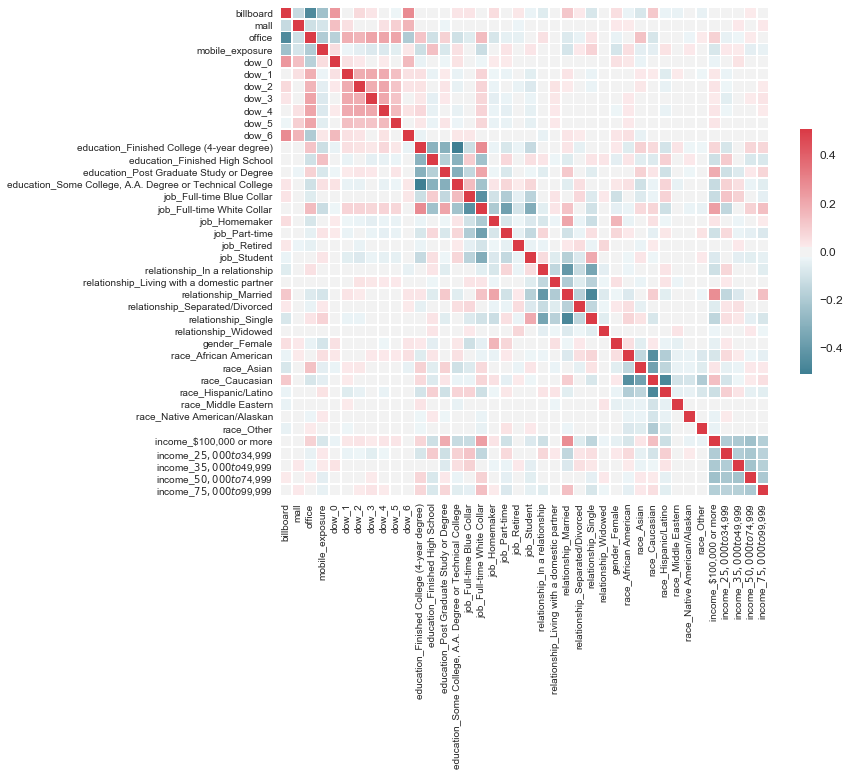

In [387]:
corr1 = feature_set1.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=1.2)
sns.heatmap(corr1, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [99]:
feature_set2 = df2.iloc[:,:27]
feature_set2.head()

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,job_Homemaker,job_Part-time,job_Retired,job_Student,relationship_In a relationship,relationship_Living with a domestic partner,relationship_Married,relationship_Separated/Divorced,relationship_Single,relationship_Widowed
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [102]:
feature_set3 = df3.iloc[:,:28]
feature_set3.head()

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,job_Homemaker,job_Part-time,job_Retired,job_Student,relationship_In a relationship,relationship_Living with a domestic partner,relationship_Married,relationship_Separated/Divorced,relationship_Single,relationship_Widowed
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [175]:
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
scaled_feature1 = sc.fit_transform(feature_set1)
scaled_feature2 = sc.fit_transform(feature_set2)
scaled_feature3 = sc.fit_transform(feature_set3)

In [176]:
X1 = scaled_feature1 
y1 = df1.conversion

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.33, random_state=42)

In [177]:
gs1 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train1), n_folds=10),
    scoring='accuracy'
)


gs1.fit(X_train1, y_train1)
gs1.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.96273, std: 0.01088, params: {'C': 1, 'class_weight': None},
 mean: 0.60693, std: 0.02168, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.96273, std: 0.01088, params: {'C': 2, 'class_weight': None},
 mean: 0.60851, std: 0.02446, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.96273, std: 0.01088, params: {'C': 3, 'class_weight': None},
 mean: 0.61010, std: 0.02545, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.96273, std: 0.01088, params: {'C': 4, 'class_weight': None},
 mean: 0.61010, std: 0.02596, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.96273, std: 0.01088, params: {'C': 5, 'class_weight': None},
 mean: 0.61116, std: 0.02629, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.96273, std: 0.01088, params: {'C': 6, 'class_weight': None},
 mean: 0.61142, std: 0.02667, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.96273, std: 0.01088, params: {'C': 7, 'class_weight': None},
 mean: 0.61195, std: 0.02667, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [178]:
zip(feature_set1,gs1.best_estimator_.coef_[0])

[('billboard', -0.056891352382263533),
 ('mall', 0.058453666231080385),
 ('office', 0.1368749934637476),
 ('mobile_exposure', -0.12322514905148658),
 ('dow_0', -0.16651816705219133),
 ('dow_1', 0.15595579626601352),
 ('dow_2', -0.048694001771881733),
 ('dow_3', 0.029896609196434366),
 ('dow_4', 0.017145542914240967),
 ('dow_5', 0.0096793796557092682),
 ('dow_6', -0.19606261040667089),
 ('education_Finished College (4-year degree)', 0.25886280950903384),
 ('education_Finished High School', 0.16422745128248717),
 ('education_Post Graduate Study or Degree', 0.16897362948571565),
 ('education_Some College, A.A. Degree or Technical College',
  0.042072812896124925),
 ('job_Full-time Blue Collar', -0.021212307505491489),
 ('job_Full-time White Collar', 0.0),
 ('job_Homemaker', 0.0039356114293167127),
 ('job_Part-time', -0.13562247285604165),
 ('job_Retired', -0.25316568660428523),
 ('job_Student', -0.05957033612948965),
 ('relationship_In a relationship', 0.0),
 ('relationship_Living with a 

In [179]:
gs1.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
print gs1.best_score_

0.962727993656


In [181]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_train1, gs1.predict(X_train1))

0.5

In [182]:
roc_auc_score(y_test1, gs1.predict(X_test1))

0.5

In [183]:
gs2 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train1), n_folds=10),
    scoring='recall'
)


gs2.fit(X_train1, y_train1)
gs2.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.54538, std: 0.08759, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.51038, std: 0.07127, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.50664, std: 0.08553, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.50664, std: 0.08553, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.51141, std: 0.08765, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.51141, std: 0.08765, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.51141, std: 0.08765, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [184]:
roc_auc_score(y_train1, gs2.predict(X_train1))

0.64671328589622257

In [185]:
roc_auc_score(y_test1, gs2.predict(X_test1))
#it seems like optimizing towards recall improves roc_auc_score

0.58654244306418224

In [186]:
gs3 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l2'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train1), n_folds=10),
    scoring='recall'
)


gs3.fit(X_train1, y_train1)
gs3.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.51618, std: 0.09197, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.50372, std: 0.10083, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.50372, std: 0.10083, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.50372, std: 0.10083, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.50372, std: 0.10083, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.50372, std: 0.10083, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.49895, std: 0.09862, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [187]:
roc_auc_score(y_train1, gs3.predict(X_train1))
#replacing L1 with L2 does not change the score significantly, but it does decrease a little bit. 

0.64563835629242761

In [188]:
roc_auc_score(y_test1, gs3.predict(X_test1))

0.57504379678292716

In [189]:
X2 = scaled_feature2
y2 = df2.conversion

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.33, random_state=42)

In [190]:
gs4 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train2), n_folds=10),
    scoring='recall'
)


gs4.fit(X_train2, y_train2)
gs4.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.55425, std: 0.08423, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.56424, std: 0.07007, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.55947, std: 0.06777, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.54858, std: 0.06672, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.54858, std: 0.06672, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.55335, std: 0.06981, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.55335, std: 0.06981, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [191]:
roc_auc_score(y_train2, gs4.predict(X_train2))

0.64634816035145515

In [192]:
roc_auc_score(y_test2, gs4.predict(X_test2))

0.59145564580347187

In [193]:
X3 = scaled_feature3
y3 = df3.conversion

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.33, random_state=42)

In [194]:
gs5 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train3), n_folds=10),
    scoring='recall'
)


gs5.fit(X_train3, y_train3)
gs5.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.56638, std: 0.08248, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.56638, std: 0.08248, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.56638, std: 0.08248, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.54448, std: 0.07639, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.54925, std: 0.07934, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.54925, std: 0.07934, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.54925, std: 0.07934, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [149]:
roc_auc_score(y_train3, gs5.predict(X_train3))

0.64605021790692496

In [150]:
roc_auc_score(y_test3, gs5.predict(X_test3))

0.59887720974677505

In [151]:
gs6 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train3), n_folds=10),
    scoring='roc_auc'
)


gs6.fit(X_train3, y_train3)
gs6.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.60857, std: 0.04045, params: {'C': 1, 'class_weight': None},
 mean: 0.60705, std: 0.03893, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.60724, std: 0.04246, params: {'C': 2, 'class_weight': None},
 mean: 0.60606, std: 0.04005, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.60705, std: 0.04348, params: {'C': 3, 'class_weight': None},
 mean: 0.60615, std: 0.04082, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.60688, std: 0.04407, params: {'C': 4, 'class_weight': None},
 mean: 0.60595, std: 0.04086, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.60739, std: 0.04484, params: {'C': 5, 'class_weight': None},
 mean: 0.60555, std: 0.04105, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.60753, std: 0.04488, params: {'C': 6, 'class_weight': None},
 mean: 0.60530, std: 0.04123, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.60739, std: 0.04496, params: {'C': 7, 'class_weight': None},
 mean: 0.60497, std: 0.04149, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [152]:
roc_auc_score(y_train3, gs6.predict(X_train3))

0.5

In [153]:
roc_auc_score(y_test3, gs6.predict(X_test3))

0.5

In [154]:
gs7 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train3), n_folds=10),
    scoring='precision'
)


gs7.fit(X_train3, y_train3)
gs7.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic cl

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.05424, std: 0.01901, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.05466, std: 0.01883, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.05465, std: 0.01895, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.05279, std: 0.01806, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.05336, std: 0.01924, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.05333, std: 0.01923, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.05335, std: 0.01921, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [195]:
roc_auc_score(y_train3, gs7.predict(X_train3))

0.64538714991762758

In [196]:
roc_auc_score(y_test3, gs7.predict(X_test3))

0.59089823220257998

Findings: it seems like optimizing towards accuracy or roc_auc does not improve roc_auc_score; however, optimizing towards recall and precision help with enhancing performance. Therefore, in the next iteration of modeling, we're going to use recall and precision as the scoring parameters in grid search. 

In [197]:
df1.head()

,billboard,mall,office,mobile_exposure,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,...,race_Hispanic/Latino,race_Middle Eastern,race_Native American/Alaskan,race_Other,"income_$100,000 or more","income_$25,000 to $34,999","income_$35,000 to $49,999","income_$50,000 to $74,999","income_$75,000 to $99,999",conversion
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [198]:
feature_set4 = feature_set1.drop(['job_Full-time White Collar', 'relationship_In a relationship',
                                 'race_Asian', 'race_Caucasian'], axis=1)

In [199]:
scaled_feature4 = sc.fit_transform(feature_set4)
X4 = scaled_feature4
y4 = df3.conversion

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4, y4, test_size=0.33, random_state=42)

In [204]:
gs8 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train4), n_folds=10),
    scoring='recall'
)


gs8.fit(X_train4, y_train4)
gs8.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.55307, std: 0.07571, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.53622, std: 0.06170, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.53622, std: 0.06170, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.52623, std: 0.07370, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.51909, std: 0.07915, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.51141, std: 0.08765, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.51141, std: 0.08765, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [205]:
roc_auc_score(y_train4, gs8.predict(X_train4))

0.64712514751072014

In [207]:
roc_auc_score(y_test4, gs8.predict(X_test4))

0.58654244306418224

In [209]:
gs9 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train4), n_folds=10),
    scoring='precision'
)


gs9.fit(X_train4, y_train4)
gs9.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.05149, std: 0.01546, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.05070, std: 0.01507, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.05086, std: 0.01513, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.04994, std: 0.01540, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.04944, std: 0.01582, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.04876, std: 0.01621, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.04878, std: 0.01620, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [210]:
roc_auc_score(y_train4, gs9.predict(X_train4))

0.64712514751072014

In [212]:
roc_auc_score(y_test4, gs9.predict(X_test4))

0.58654244306418224

In [227]:
zip(feature_set4,gs9.best_estimator_.coef_[0])

[('billboard', -0.025198837293350828),
 ('mall', 0.046014549681415148),
 ('office', 0.1443402273229438),
 ('mobile_exposure', -0.13159643119066677),
 ('dow_0', -0.18867245611187913),
 ('dow_1', 0.16104560522820208),
 ('dow_2', -0.099303035533745518),
 ('dow_3', 0.0),
 ('dow_4', 0.014184507378519572),
 ('dow_5', 0.0086827872866892079),
 ('dow_6', -0.20233220538455221),
 ('education_Finished College (4-year degree)', 0.22732216369252203),
 ('education_Finished High School', 0.2383904073392156),
 ('education_Post Graduate Study or Degree', 0.17520689230735645),
 ('education_Some College, A.A. Degree or Technical College',
  0.032948651686956189),
 ('job_Full-time Blue Collar', 0.0),
 ('job_Homemaker', -0.054216900613214762),
 ('job_Part-time', -0.13577557307462521),
 ('job_Retired', -0.3119131143284618),
 ('job_Student', -0.087100765773703515),
 ('relationship_Living with a domestic partner', -0.10776235275321271),
 ('relationship_Married', -0.50273458933390514),
 ('relationship_Separated

In [228]:
feature_set5 = feature_set4.drop(['job_Full-time Blue Collar', 'income_$100,000 or more',
                                 'dow_3'], axis=1)

In [233]:
scaled_feature5 = sc.fit_transform(feature_set5)
X5 = scaled_feature5
y5 = df3.conversion

X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X5, y5, test_size=0.33, random_state=42)

In [234]:
gs10 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train5), n_folds=10),
    scoring='recall'
)


gs10.fit(X_train5, y_train5)
gs10.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.56432, std: 0.07302, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.55521, std: 0.09146, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.54522, std: 0.07980, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.54522, std: 0.07980, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [235]:
roc_auc_score(y_train5, gs10.predict(X_train5))

0.64712514751072014

In [236]:
roc_auc_score(y_test5, gs10.predict(X_test5))

0.58654244306418224

In [237]:
gs11 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l2'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train5), n_folds=10),
    scoring='recall'
)


gs11.fit(X_train5, y_train5)
gs11.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.53753, std: 0.09049, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [238]:
roc_auc_score(y_train5, gs11.predict(X_train5))

0.6521814060546578

In [239]:
roc_auc_score(y_test5, gs11.predict(X_test5))

0.5711419015766841

In [240]:
zip(feature_set5,gs10.best_estimator_.coef_[0])

[('billboard', -0.025199062187672695),
 ('mall', 0.04601443007777694),
 ('office', 0.14433992700255491),
 ('mobile_exposure', -0.13159676655906344),
 ('dow_0', -0.18867259749050211),
 ('dow_1', 0.16104501130509968),
 ('dow_2', -0.099302919567862302),
 ('dow_4', 0.014185062431312179),
 ('dow_5', 0.008683451149646115),
 ('dow_6', -0.20233213140745634),
 ('education_Finished College (4-year degree)', 0.22732668788994864),
 ('education_Finished High School', 0.23839316445822045),
 ('education_Post Graduate Study or Degree', 0.17521113534402363),
 ('education_Some College, A.A. Degree or Technical College',
  0.032952586852278448),
 ('job_Homemaker', -0.054216951971771128),
 ('job_Part-time', -0.13577544215835832),
 ('job_Retired', -0.31191297055225514),
 ('job_Student', -0.087100256374571444),
 ('relationship_Living with a domestic partner', -0.10776237210431894),
 ('relationship_Married', -0.50273441929417162),
 ('relationship_Separated/Divorced', -0.20439866219273331),
 ('relationship_Si

In [242]:
feature_set6 = feature_set5.drop(['billboard','dow_0','dow_1','dow_2',
                                  'dow_4','dow_5','dow_6',
                                'relationship_Widowed','race_Middle Eastern',
                                 'race_Hispanic/Latino','race_Other'], axis=1)

In [243]:
scaled_feature6 = sc.fit_transform(feature_set6)
X6 = scaled_feature6
y6 = df3.conversion

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X6, y6, test_size=0.33, random_state=42)

In [244]:
gs12 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train6), n_folds=10),
    scoring='recall'
)


gs12.fit(X_train6, y_train6)
gs12.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [245]:
roc_auc_score(y_train6, gs12.predict(X_train6))

0.63097199341021404

In [246]:
roc_auc_score(y_test6, gs12.predict(X_test6))

0.56880872750437961

In [247]:
gs13 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train6), n_folds=10),
    scoring='precision'
)


gs13.fit(X_train6, y_train6)
gs13.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.05179, std: 0.01750, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.05201, std: 0.01744, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.05217, std: 0.01724, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.05211, std: 0.01705, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.05219, std: 0.01718, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.05226, std: 0.01713, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.05219, std: 0.01716, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [248]:
roc_auc_score(y_train6, gs13.predict(X_train6))

0.63138385502471173

In [249]:
roc_auc_score(y_test6, gs13.predict(X_test6))

0.56222328396241439

In [250]:
gs14 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l2'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train6), n_folds=10),
    scoring='recall'
)


gs14.fit(X_train6, y_train6)
gs14.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [251]:
roc_auc_score(y_train6, gs14.predict(X_train6))

0.63017163821608424

In [252]:
roc_auc_score(y_test6, gs14.predict(X_test6))

0.56417423156553592

In [253]:
zip(feature_set6,gs12.best_estimator_.coef_[0])

[('mall', 0.028134267276694356),
 ('office', 0.22749079049328577),
 ('mobile_exposure', -0.13259820395386307),
 ('education_Finished College (4-year degree)', 0.20999686330717493),
 ('education_Finished High School', 0.19815702714313022),
 ('education_Post Graduate Study or Degree', 0.14844921441615785),
 ('education_Some College, A.A. Degree or Technical College',
  0.0025140984092722135),
 ('job_Homemaker', -0.023325923199661546),
 ('job_Part-time', -0.11457316577837813),
 ('job_Retired', -0.3045982342148576),
 ('job_Student', -0.075445893704082889),
 ('relationship_Living with a domestic partner', -0.12396681150807777),
 ('relationship_Married', -0.51664149558323147),
 ('relationship_Separated/Divorced', -0.21432077665947968),
 ('relationship_Single', -0.02183135522753453),
 ('gender_Female', 0.0),
 ('race_African American', -0.15954986265428653),
 ('race_Native American/Alaskan', -0.22943867351287425),
 ('income_$25,000 to $34,999', -0.15818804881150508),
 ('income_$35,000 to $49,9

In [254]:
feature_set7 = feature_set6.drop(['gender_Female','mall'], axis=1)

In [255]:
scaled_feature7 = sc.fit_transform(feature_set7)
X7 = scaled_feature7
y7 = df3.conversion

X_train7, X_test7, y_train7, y_test7 = train_test_split(
X7, y7, test_size=0.33, random_state=42) 

gs15 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train7), n_folds=10),
    scoring='recall'
)


gs15.fit(X_train7, y_train7)
gs15.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.57661, std: 0.07350, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.57661, std: 0.07350, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.59411, std: 0.09139, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [256]:
roc_auc_score(y_train7, gs15.predict(X_train7))

0.62975977660158666

In [257]:
roc_auc_score(y_test7, gs15.predict(X_test7))

0.56333811116419807

In [258]:
zip(feature_set7,gs15.best_estimator_.coef_[0])

[('office', 0.22201007568839451),
 ('mobile_exposure', -0.14687706579919824),
 ('education_Finished College (4-year degree)', 0.60016988251952119),
 ('education_Finished High School', 0.49916829123729844),
 ('education_Post Graduate Study or Degree', 0.45047672416363349),
 ('education_Some College, A.A. Degree or Technical College',
  0.39371780204814),
 ('job_Homemaker', -0.035756293239213754),
 ('job_Part-time', -0.13017064775319226),
 ('job_Retired', -0.5073212103587037),
 ('job_Student', -0.08407073164750524),
 ('relationship_Living with a domestic partner', -0.14508484336661703),
 ('relationship_Married', -0.55510032105843332),
 ('relationship_Separated/Divorced', -0.23635530009262901),
 ('relationship_Single', -0.044469789068516272),
 ('race_African American', -0.17439367529733374),
 ('race_Native American/Alaskan', -0.39309147493827901),
 ('income_$25,000 to $34,999', -0.17119388736263794),
 ('income_$35,000 to $49,999', -0.1289378404792533),
 ('income_$50,000 to $74,999', -0.23

In [260]:
feature_set8 = feature_set7.join(feature_set3.age)

In [261]:
scaled_feature8 = sc.fit_transform(feature_set8)
X8 = scaled_feature8
y8 = df3.conversion

X_train8, X_test8, y_train8, y_test8 = train_test_split(
X8, y8, test_size=0.33, random_state=42) 

gs16 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train8), n_folds=10),
    scoring='recall'
)


gs16.fit(X_train8, y_train8)
gs16.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.57661, std: 0.07350, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.58162, std: 0.07656, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [262]:
roc_auc_score(y_train8, gs16.predict(X_train8))

0.63126993585474422

In [263]:
roc_auc_score(y_test8, gs16.predict(X_test8))

0.56473164516642771

Findings so far: it seems like using feature_set3 with L1 regularization and optimizing towards recall results in the best test and training scores. 

In [269]:
zip(feature_set3,gs5.best_estimator_.coef_[0])

[('billboard', -0.020937258306005953),
 ('mall', 0.044218896988877668),
 ('office', 0.16051572474560397),
 ('mobile_exposure', -0.1424015389140636),
 ('dow_0', -0.17346772845531094),
 ('dow_1', 0.16445195070587831),
 ('dow_2', -0.091075723580241283),
 ('dow_3', 0.0),
 ('dow_4', 0.0086835967833327095),
 ('dow_5', 0.0),
 ('dow_6', -0.21732726847436448),
 ('age', -0.018478179840455487),
 ('education_Finished College (4-year degree)', 0.19846028765145202),
 ('education_Finished High School', 0.21729407757565475),
 ('education_Post Graduate Study or Degree', 0.16141193589886799),
 ('education_Some College, A.A. Degree or Technical College',
  0.019853478329226806),
 ('job_Full-time Blue Collar', 0.0),
 ('job_Full-time White Collar', 0.039902893646856591),
 ('job_Homemaker', -0.0064037582302062523),
 ('job_Part-time', -0.080555219617410578),
 ('job_Retired', -0.29266567858549625),
 ('job_Student', -0.050163664668098171),
 ('relationship_In a relationship', 0.0049674491996955002),
 ('relation

In [270]:
from sklearn.metrics import classification_report

print classification_report(y_test3, gs5.predict(X_test3), target_names=['converted', 'not-converted'])

               precision    recall  f1-score   support

    converted       0.97      0.61      0.75      1794
not-converted       0.06      0.59      0.10        70

  avg / total       0.94      0.61      0.73      1864



In [276]:
feature_set9 = feature_set1.join(feature_set3.age)

In [277]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,50,100,200],'class_weight':['balanced',None]
             ,'max_depth':[5,6,7,8]}
clf_rf = grid_search.GridSearchCV(RandomForestClassifier(), parameters,
                               scoring='recall')
clf_rf.fit(feature_set9, df1.conversion)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 6, 7, 8], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [278]:
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [279]:
clf_rf.best_score_

0.3273511085995342

In [290]:
features = feature_set9.columns
feature_importances = clf_rf.best_estimator_.feature_importances_
#did some debugging here after having no luck with feature_importances only

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(n=10)

,Features,Importance Score
40,age,0.122150
0,billboard,0.095274
10,dow_6,0.063114
23,relationship_Married,0.052121
12,education_Finished High School,0.046056
2,office,0.045315
18,job_Part-time,0.036866
11,education_Finished College (4-year degree),0.036301
16,job_Full-time White Collar,0.033753
3,mobile_exposure,0.033205


In [291]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf_rf, feature_set9, df1.conversion, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.60772471  0.61265374  0.62422737], Average AUC 0.614868608265


After calculating the average AUC score of random forest using a 3-fold cross validation, it seems like Logistic Regression is not as good as Random Forest in terms of performance. To double check, we're going to run the Random Forest model on test and training datasets.

In [292]:
clf_rf2 = clf_rf
clf_rf2.fit(X_train3, y_train3)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 6, 7, 8], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [293]:
roc_auc_score(y_train3, clf_rf2.predict(X_train3))

0.74896888546157725

In [294]:
roc_auc_score(y_test3, clf_rf2.predict(X_test3))

0.58760949195731804

In [296]:
print classification_report(y_test3, clf_rf2.predict(X_test3), target_names=['converted', 'not-converted'])

               precision    recall  f1-score   support

    converted       0.97      0.80      0.88      1794
not-converted       0.07      0.37      0.12        70

  avg / total       0.94      0.79      0.85      1864



In [297]:
df3['prediction'] = gs5.predict_proba(scaled_feature3)[:,1]

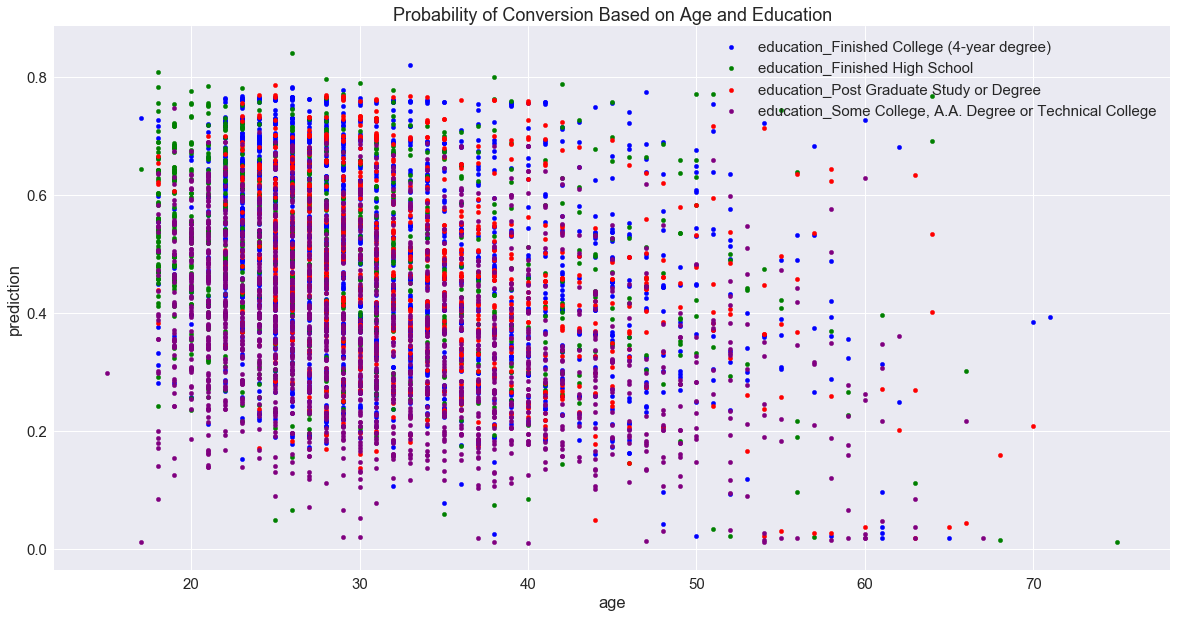

In [343]:
fig, ax = plt.subplots(figsize=(20, 10))
education = ['education_Finished College (4-year degree)', 
 'education_Finished High School',
 'education_Post Graduate Study or Degree',
 'education_Some College, A.A. Degree or Technical College']
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df3[df3[education[e]] == 1].plot(x='age', y='prediction', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of Conversion Based on Age and Education')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:4], labels=education, loc='best') 

In [321]:
df3['prediction2'] = clf_rf2.predict_proba(scaled_feature3)[:,1]

[(0, 1),
 (0, 1),

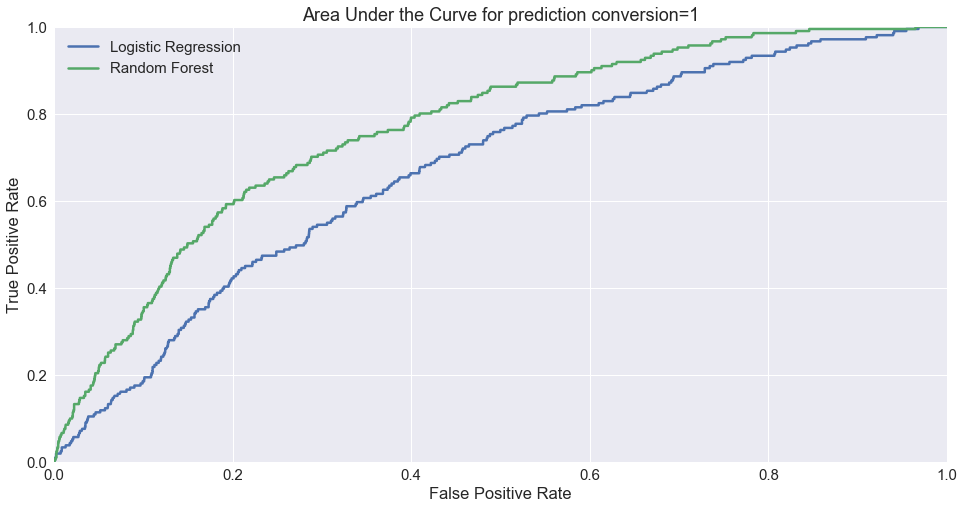

In [327]:
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(figsize=(16, 8))
vals = roc_curve(df3.conversion, df3.prediction)
lr, = ax.plot(vals[0], vals[1], label = 'Logistic Regression')
vals = roc_curve(df3.conversion, df3.prediction2)
rf, = ax.plot(vals[0], vals[1], label = 'Random Forest')
plt.legend(handles=[lr, rf])

ax.set(title='Area Under the Curve for prediction conversion=1', 
       ylabel='True Positive Rate', xlabel='False Positive Rate', 
       xlim=(0, 1), ylim=(0, 1))

In [333]:
X_train3_pd = pd.DataFrame(X_train3)
X_test3_pd = pd.DataFrame(X_test3)

[(0, 1),
 (0, 1),

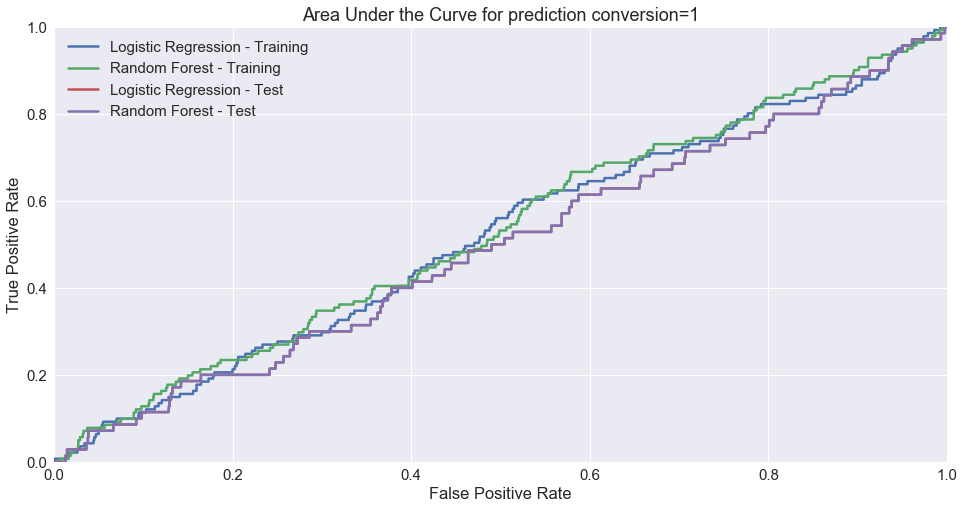

In [342]:
X_train3_pd['prediction'] = gs5.predict_proba(scaled_feature3)[:3783,1]
X_train3_pd['prediction2'] = clf_rf2.predict_proba(scaled_feature3)[:3783,1]
X_test3_pd['prediction'] = gs5.predict_proba(scaled_feature3)[:1864,1]
X_test3_pd['prediction2'] = clf_rf2.predict_proba(scaled_feature3)[:1864,1]
#did some debugging here to match the length of predicted value array and train/test data. 

fig, ax = plt.subplots(figsize=(16, 8))
vals = roc_curve(y_train3, X_train3_pd.prediction)
lr_train, = ax.plot(vals[0], vals[1], label = 'Logistic Regression - Training')
vals = roc_curve(y_train3, X_train3_pd.prediction2)
rf_train, = ax.plot(vals[0], vals[1], label = 'Random Forest - Training')
vals = roc_curve(y_test3, X_test3_pd.prediction)
lr_test, = ax.plot(vals[0], vals[1], label = 'Logistic Regression - Test')
vals = roc_curve(y_test3, X_test3_pd.prediction)
rf_test, = ax.plot(vals[0], vals[1], label = 'Random Forest - Test')
plt.legend(handles=[lr_train, rf_train, lr_test, rf_test])

ax.set(title='Area Under the Curve for prediction conversion=1', 
       ylabel='True Positive Rate', xlabel='False Positive Rate', 
       xlim=(0, 1), ylim=(0, 1))

In [346]:
pd.DataFrame(zip(feature_set3,gs5.best_estimator_.coef_[0]))

,0,1
0,billboard,-0.020937
1,mall,0.044219
2,office,0.160516
3,mobile_exposure,-0.142402
4,dow_0,-0.173468
5,dow_1,0.164452
6,dow_2,-0.091076
7,dow_3,0.000000
8,dow_4,0.008684
9,dow_5,0.000000


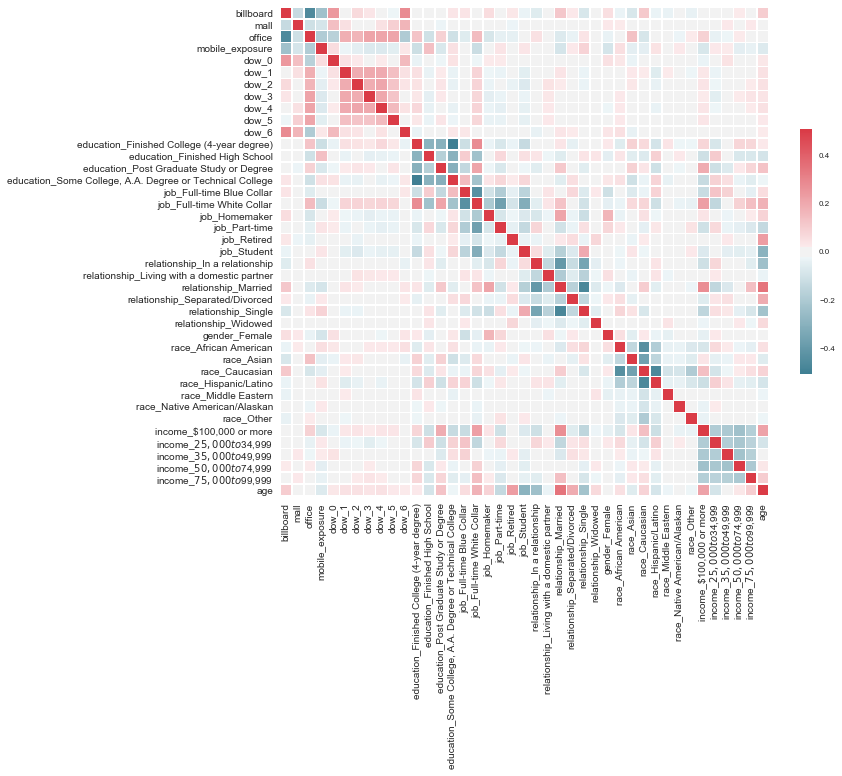

In [373]:
corr9 = feature_set9.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=0.8)
sns.heatmap(corr9, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

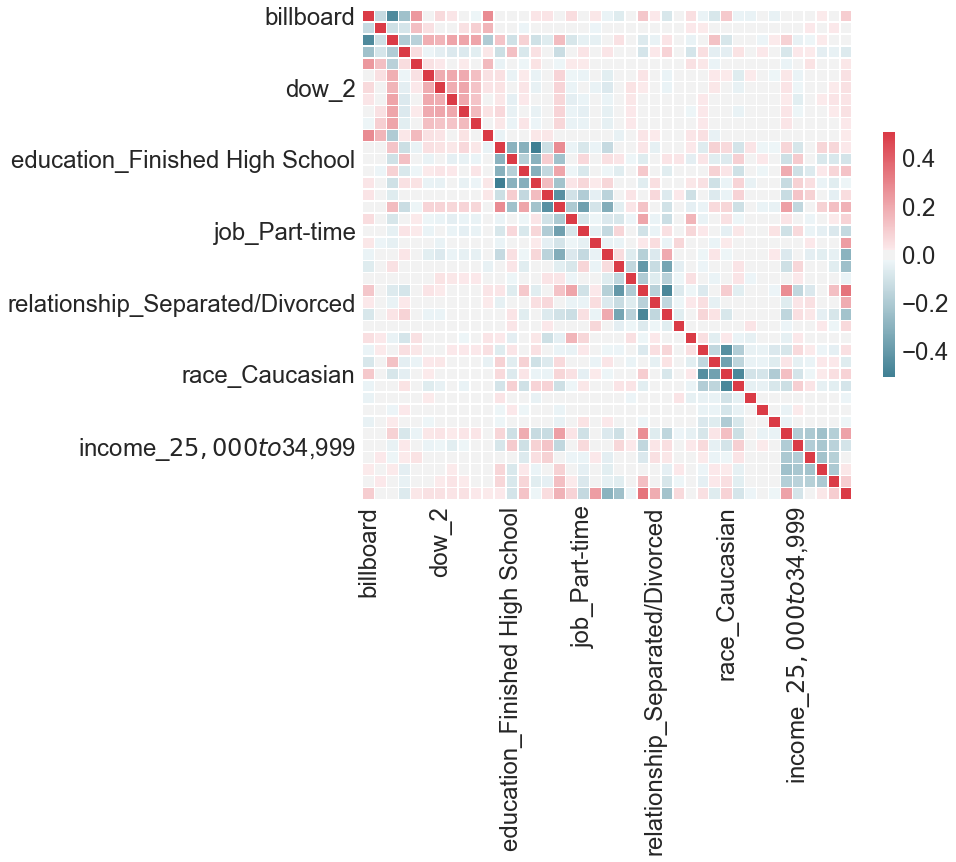

In [380]:
corr9 = feature_set9.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr9, cmap=cmap, vmax=.3,
            square=True,xticklabels=6, yticklabels=6,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [388]:
df_raw2 = pd.read_csv('finalproject_dataframe_3.csv')
df_raw2.head()

,panelistid,education,employment,marital_status,city,state,zipcode,gender,age,ethnicity,...,campaign,vertical,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,distance
0,2473181,"Some College, A.A. Degree or Technical College",Full-time Blue Collar,Single,Nederland,TX,77627,Male,19,Caucasian,...,BWW Fantasy Football,Dining,0,0,0,1,1,0,1,0.042081
1,1327885,Finished College (4-year degree),Full-time White Collar,Married,Fort Lauderdale,FL,33308,Male,46,Caucasian,...,BWW Fantasy Football,Dining,0,0,0,0,1,1,0,0.082412
2,2350042,"Some College, A.A. Degree or Technical College",Part-time,Single,Arlington,TX,76010,Male,23,Hispanic/Latino,...,BWW Fantasy Football,Dining,0,0,0,0,0,0,1,0.065859
3,2055981,"Some College, A.A. Degree or Technical College",Full-time White Collar,In a relationship,Huntington Park,CA,90255,Female,29,Hispanic/Latino,...,BWW Fantasy Football,Dining,0,1,0,1,0,0,0,0.053547
4,2214039,"Some College, A.A. Degree or Technical College",Student,In a relationship,Mesa,AZ,85201,Male,22,Native American/Alaskan,...,BWW Fantasy Football,Dining,1,0,0,0,1,0,0,0.041638


In [390]:
df_raw2['distance'].describe()

count    5647.000000
mean        0.064371
std         0.108637
min         0.000684
25%         0.015385
50%         0.041054
75%         0.079361
max         1.931559
Name: distance, dtype: float64

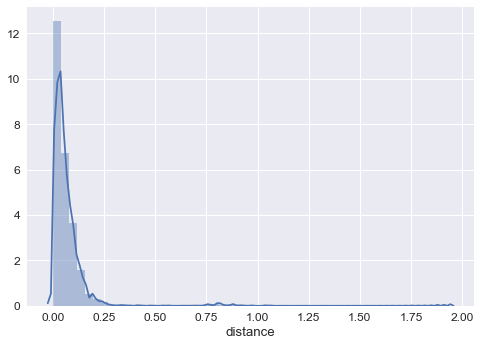

In [391]:
sns.distplot(df_raw2['distance'])

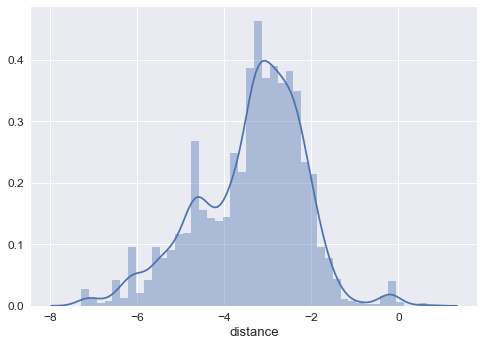

In [392]:
sns.distplot(np.log(df_raw2['distance'])) #use logarithm to normalize distribution of the distance metric

In [394]:
df_raw2['age'] = df_raw2['age'].replace([-1,0,6,7],[18,18,18,18])

In [395]:
df_raw2['income'] = df_raw2['income'].replace(['$75,000 to $99,999 ','$35,000 to $49,999 '],['$75,000 to $99,999','$35,000 to $49,999'])

In [396]:
df_raw2['log_dist'] = np.log(df_raw2['distance'])

In [397]:
feature_set10 = feature_set9.join(df_raw2.log_dist)

In [398]:
scaled_feature10 = sc.fit_transform(feature_set10)

In [399]:
X10 = scaled_feature10 
y10 = df1.conversion

X_train10, X_test10, y_train10, y_test10 = train_test_split(
    X10, y10, test_size=0.33, random_state=42)

In [400]:
gs17 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train10), n_folds=10),
    scoring='recall'
)


gs17.fit(X_train10, y_train10)
gs17.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.53705, std: 0.08755, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.50747, std: 0.08918, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.50747, std: 0.08918, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.50747, std: 0.08918, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.50747, std: 0.08918, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.50747, std: 0.08918, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.50747, std: 0.08918, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [403]:
roc_auc_score(y_train10, gs17.predict(X_train10))

0.64685057310105498

In [404]:
roc_auc_score(y_test10, gs17.predict(X_test10))

0.58709985666507403

In [405]:
feature_set11 = feature_set3.join(df_raw2.log_dist)

In [406]:
scaled_feature11 = sc.fit_transform(feature_set11)

In [407]:
X11 = scaled_feature11 
y11 = df1.conversion

X_train11, X_test11, y_train11, y_test11 = train_test_split(
    X11, y11, test_size=0.33, random_state=42)

In [408]:
gs18 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train11), n_folds=10),
    scoring='recall'
)


gs18.fit(X_train11, y_train11)
gs18.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.55389, std: 0.08212, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.55389, std: 0.08212, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.55389, std: 0.08212, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.54390, std: 0.06872, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.53676, std: 0.07621, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.53676, std: 0.07621, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.53676, std: 0.07621, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [410]:
roc_auc_score(y_train11, gs18.predict(X_train11))

0.65069461483636537

In [412]:
roc_auc_score(y_test11, gs18.predict(X_test11))

0.59720496894409947

In [418]:
zip(feature_set10,gs17.best_estimator_.coef_[0])

[('billboard', -0.026972914898181936),
 ('mall', 0.046360052218176726),
 ('office', 0.14475828695224099),
 ('mobile_exposure', -0.13186058405146384),
 ('dow_0', -0.18934180517065174),
 ('dow_1', 0.1618584670343268),
 ('dow_2', -0.097265921765634436),
 ('dow_3', 0.0),
 ('dow_4', 0.015356756380162786),
 ('dow_5', 0.0072154652301461503),
 ('dow_6', -0.20246284627110034),
 ('education_Finished College (4-year degree)', 0.21324022806720114),
 ('education_Finished High School', 0.23666267389785117),
 ('education_Post Graduate Study or Degree', 0.16487668958853974),
 ('education_Some College, A.A. Degree or Technical College',
  0.028078581115011807),
 ('job_Full-time Blue Collar', 0.011875983534465116),
 ('job_Full-time White Collar', 0.044454092266736057),
 ('job_Homemaker', -0.040839508136955138),
 ('job_Part-time', -0.11621194721219051),
 ('job_Retired', -0.30412961686274503),
 ('job_Student', -0.070392766099512005),
 ('relationship_In a relationship', 0.016977343849913087),
 ('relationsh

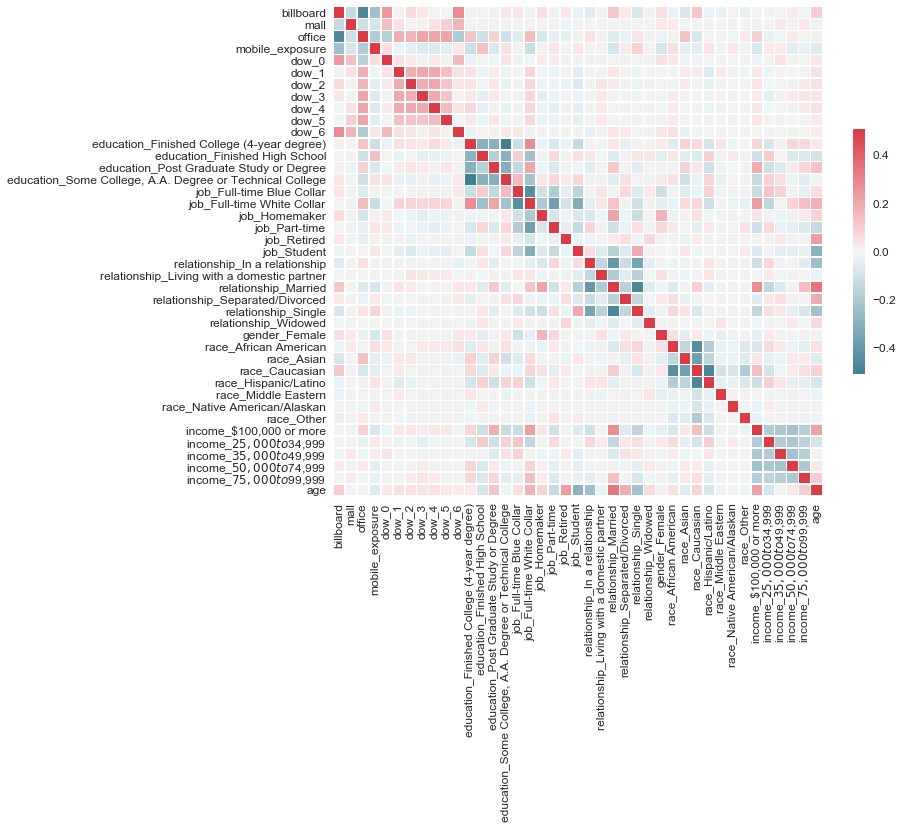

In [417]:
corr10 = feature_set10.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=1.2)
sns.heatmap(corr9, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [419]:
zip(feature_set11,gs18.best_estimator_.coef_[0])

[('billboard', -0.019749256432782535),
 ('mall', 0.048419720215227127),
 ('office', 0.16481960226973055),
 ('mobile_exposure', -0.14172081756665494),
 ('dow_0', -0.17249607276132439),
 ('dow_1', 0.16398850159402287),
 ('dow_2', -0.090513277398036732),
 ('dow_3', 0.0),
 ('dow_4', 0.0090640888877722373),
 ('dow_5', 0.0),
 ('dow_6', -0.21779350158867541),
 ('age', -0.018890634817817914),
 ('education_Finished College (4-year degree)', 0.19406997454159503),
 ('education_Finished High School', 0.21402131905700955),
 ('education_Post Graduate Study or Degree', 0.15864080451933246),
 ('education_Some College, A.A. Degree or Technical College',
  0.016050483600860543),
 ('job_Full-time Blue Collar', 0.0),
 ('job_Full-time White Collar', 0.039566661535511624),
 ('job_Homemaker', -0.0064832438134200462),
 ('job_Part-time', -0.081263840824126576),
 ('job_Retired', -0.29251194639652961),
 ('job_Student', -0.050687247552642013),
 ('relationship_In a relationship', 0.0054566656383896427),
 ('relatio

In [420]:
feature_set12 = feature_set3.join(df_raw2.distance)
scaled_feature12 = sc.fit_transform(feature_set12)

In [421]:
X12 = scaled_feature12
y12 = df1.conversion

X_train12, X_test12, y_train12, y_test12 = train_test_split(
    X12, y12, test_size=0.33, random_state=42)

In [422]:
gs19 = grid_search.GridSearchCV(
    estimator=LogisticRegression(penalty='l1'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train12), n_folds=10),
    scoring='recall'
)


gs19.fit(X_train12, y_train12)
gs19.grid_scores_

/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/eugeniechen/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

[mean: 0.00000, std: 0.00000, params: {'C': 1, 'class_weight': None},
 mean: 0.56014, std: 0.08014, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 2, 'class_weight': None},
 mean: 0.56638, std: 0.08248, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 3, 'class_weight': None},
 mean: 0.56638, std: 0.08248, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 4, 'class_weight': None},
 mean: 0.55162, std: 0.06810, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 5, 'class_weight': None},
 mean: 0.55162, std: 0.06810, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 6, 'class_weight': None},
 mean: 0.55162, std: 0.06810, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.00000, std: 0.00000, params: {'C': 7, 'class_weight': None},
 mean: 0.55162, std: 0.06810, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [423]:
roc_auc_score(y_train12, gs18.predict(X_train12))

0.64577564349726002

In [424]:
roc_auc_score(y_test12, gs18.predict(X_test12))

0.5985985029463291

In [425]:
feature_set13 = feature_set9.join(df_raw2.distance)
parameters = {'n_estimators':[10,50,100,200],'class_weight':['balanced',None]
             ,'max_depth':[5,6,7,8]}
clf_rf3 = grid_search.GridSearchCV(RandomForestClassifier(), parameters,
                               scoring='recall')
clf_rf3.fit(feature_set13, df1.conversion)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 6, 7, 8], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [426]:
clf_rf3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [427]:
clf_rf3.best_score_

0.30348123805699434

In [430]:
features_new = feature_set13.columns
feature_importances = clf_rf3.best_estimator_.feature_importances_

features_df_new = pd.DataFrame({'Features': features_new, 'Importance Score': feature_importances})
features_df_new.sort_values('Importance Score', inplace=True, ascending=False)

features_df_new.head(n=10)

,Features,Importance Score
40,age,0.114709
41,distance,0.114333
23,relationship_Married,0.069006
2,office,0.065727
10,dow_6,0.052880
0,billboard,0.049157
14,"education_Some College, A.A. Degree or Technic...",0.039842
4,dow_0,0.032940
11,education_Finished College (4-year degree),0.032064
21,relationship_In a relationship,0.025700


In [432]:
pd.DataFrame(zip(feature_set12,gs19.best_estimator_.coef_[0]))

,0,1
0,billboard,-0.025137
1,mall,0.058463
2,office,0.167048
3,mobile_exposure,-0.145394
4,dow_0,-0.177527
5,dow_1,0.167609
6,dow_2,-0.100925
7,dow_3,0.000000
8,dow_4,0.015197
9,dow_5,0.004575


In [433]:
roc_auc_score(df1.conversion, clf_rf3.predict(feature_set13))

0.73073358581895675

In [434]:
scores2 = cross_val_score(clf_rf3, feature_set13, df1.conversion, scoring='roc_auc')

CV AUC [ 0.60772471  0.61265374  0.62422737], Average AUC 0.614868608265


In [435]:
print('CV AUC {}, Average AUC {}'.format(scores2, scores2.mean()))

CV AUC [ 0.60634891  0.61829864  0.58098392], Average AUC 0.601877156982


In [438]:
clf_rf4 = clf_rf3
clf_rf4.fit(X_train3, y_train3)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 6, 7, 8], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [439]:
roc_auc_score(y_train3, clf_rf4.predict(X_train3))

0.70609438349282017

In [440]:
roc_auc_score(y_test3, clf_rf4.predict(X_test3))

0.60865583691670644

In [441]:
print classification_report(y_test3, clf_rf4.predict(X_test3), target_names=['converted', 'not-converted'])

               precision    recall  f1-score   support

    converted       0.97      0.79      0.87      1794
not-converted       0.07      0.43      0.13        70

  avg / total       0.94      0.78      0.84      1864



In [448]:
df3['prediction3'] = clf_rf4.predict_proba(scaled_feature3)[:,1]

[(0, 1),
 (0, 1),

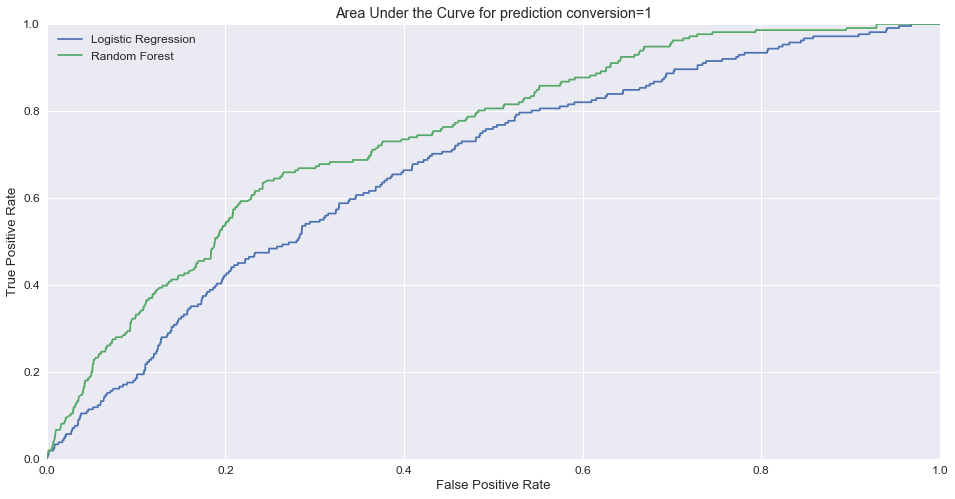

In [449]:
fig, ax = plt.subplots(figsize=(16, 8))
vals = roc_curve(df3.conversion, df3.prediction)
lr, = ax.plot(vals[0], vals[1], label = 'Logistic Regression')
vals = roc_curve(df3.conversion, df3.prediction3)
rf, = ax.plot(vals[0], vals[1], label = 'Random Forest')
plt.legend(handles=[lr, rf])

ax.set(title='Area Under the Curve for prediction conversion=1', 
       ylabel='True Positive Rate', xlabel='False Positive Rate', 
       xlim=(0, 1), ylim=(0, 1))

[(0, 1),
 (0, 1),

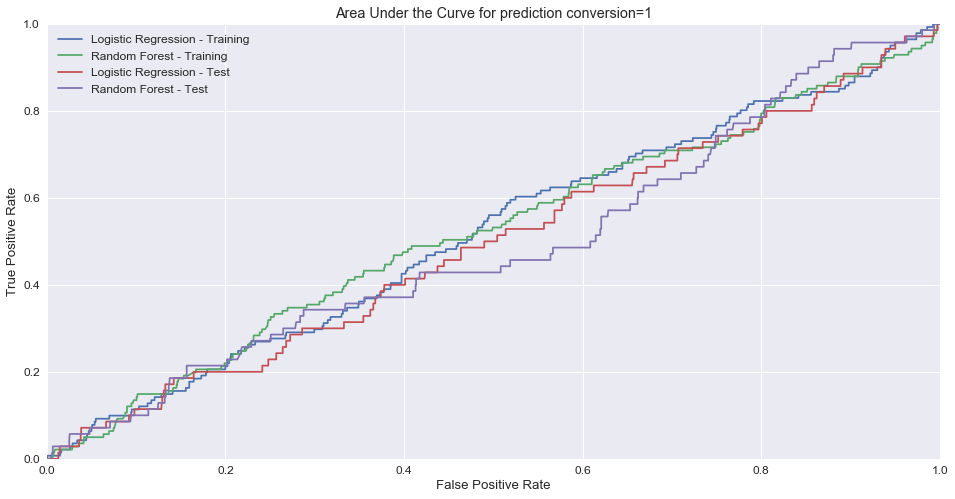

In [450]:
X_train3_pd['prediction3'] = clf_rf4.predict_proba(scaled_feature3)[:3783,1]
X_test3_pd['prediction3'] = clf_rf4.predict_proba(scaled_feature3)[:1864,1]
#did some debugging here to match the length of predicted value array and train/test data. 

fig, ax = plt.subplots(figsize=(16, 8))
vals = roc_curve(y_train3, X_train3_pd.prediction)
lr_train, = ax.plot(vals[0], vals[1], label = 'Logistic Regression - Training')
vals = roc_curve(y_train3, X_train3_pd.prediction3)
rf_train, = ax.plot(vals[0], vals[1], label = 'Random Forest - Training')
vals = roc_curve(y_test3, X_test3_pd.prediction)
lr_test, = ax.plot(vals[0], vals[1], label = 'Logistic Regression - Test')
vals = roc_curve(y_test3, X_test3_pd.prediction3)
rf_test, = ax.plot(vals[0], vals[1], label = 'Random Forest - Test')
plt.legend(handles=[lr_train, rf_train, lr_test, rf_test])

ax.set(title='Area Under the Curve for prediction conversion=1', 
       ylabel='True Positive Rate', xlabel='False Positive Rate', 
       xlim=(0, 1), ylim=(0, 1))